# 1. Perkenalan Dataset

Perpindahan pelanggan mengacu pada fenomena di mana pelanggan menghentikan hubungan atau langganan mereka dengan perusahaan atau penyedia layanan. Ini mewakili tingkat di mana pelanggan berhenti menggunakan produk atau layanan perusahaan dalam periode tertentu. Churn merupakan metrik penting bagi bisnis karena secara langsung berdampak pada pendapatan, pertumbuhan, dan retensi pelanggan.

Dalam konteks dataset Churn, label churn menunjukkan apakah pelanggan telah melakukan churn atau tidak. Pelanggan yang melakukan churn adalah pelanggan yang telah memutuskan untuk menghentikan langganan atau penggunaan layanan perusahaan. Di sisi lain, pelanggan yang tidak berpindah adalah pelanggan yang terus terlibat dan mempertahankan hubungan mereka dengan perusahaan.

Memahami churn pelanggan sangat penting bagi bisnis untuk mengidentifikasi pola, faktor, dan indikator yang berkontribusi pada atrisi pelanggan. Dengan menganalisis perilaku churn dan fitur-fitur yang terkait, perusahaan dapat mengembangkan strategi untuk mempertahankan pelanggan yang sudah ada, meningkatkan kepuasan pelanggan, dan mengurangi perputaran pelanggan. Teknik pemodelan prediktif juga dapat diterapkan untuk meramalkan dan secara proaktif mengatasi potensi churn, sehingga perusahaan dapat mengambil langkah-langkah proaktif untuk mempertahankan pelanggan yang berisiko.

Sumber dataset ini berasal dari kaggle. Dapat diakses melalui link berikut: [Link](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv)

# 2. Setup dan Import Libraries

In [27]:
# Data manipulation dan analisis
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

# Machine learning
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import optuna

# MLflow untuk experiment tracking
import mlflow 
import mlflow.sklearn 
from mlflow.models.signature import infer_signature

# Set style untuk visualisasi 
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

## Customer Churn Prediction - EDA & Preprocessing

### 📋 Project Overview
Buku catatan ini berisi Analisis Data Eksplorasi (EDA) yang komprehensif dan langkah-langkah prapemrosesan untuk proyek prediksi churn pelanggan. Kita akan menggunakan MLflow untuk pelacakan eksperimen dan menyiapkan pipeline untuk penerapan dengan GitHub Actions.

### 🎯 Objectives
- Memahami pola churn pelanggan melalui EDA
- Mengidentifikasi fitur-fitur utama yang mempengaruhi churn pelanggan
- Menyiapkan data yang bersih dan terproses untuk model machine learning
- Menyiapkan pelacakan eksperimen MLflow
- Mendokumentasikan wawasan dan langkah-langkah preprocessing

### 📊 Dataset Information
- **Data Pelatihan**: customer_churn_dataset-training-master.csv
- **Data Pengujian**: customer_churn_dataset-testing-master.csv
- **Variabel Target**: Churn (1 = Berhenti, 0 = Bertahan)


# 3. Data Loading dan Initial Exploration

In [2]:
# Load dataset
train_df = pd.read_csv('../data/customer_churn_dataset-training-master.csv')
test_df = pd.read_csv('../data/customer_churn_dataset-testing-master.csv')


print("Dataset Shape:")
print(f"Training data: {train_df.shape}")
print(f"Testing data: {test_df.shape}")

# Display basic information
print("\n" + "="*50)
print("TRAINING DATA INFO")
print("="*50)
train_df.info()

print("\n" + "="*50)
print("FIRST 5 ROWS")
print("="*50)
display(train_df.head())



Dataset Shape:
Training data: (440833, 12)
Testing data: (64374, 12)

TRAINING DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB

FIRST 5 ROWS


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


# 4. Data Quality Assessment


In [3]:
def assess_data_quality(df, dataset_name):
    """
    Comprehensive data quality assessment function 
    """
    print(f"\n{'='*60}")
    print(f"DATA QUALITY ASSESSMENT - {dataset_name.upper()}")
    print(f"{'='*60}")
    
    # Missing values
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    
    quality_df = pd.DataFrame({
        'Missing_Count': missing_data,
        'Missing_Percentage': missing_percent,
        'Data_Type': df.dtypes,
    })
    
    print("\n📊 Missing Values Summary:")
    print(quality_df[quality_df['Missing_Count'] > 0])
    
    # Duplicates
    duplicates = df.duplicated().sum()
    print(f"\n🔄 Duplicate Rows: {duplicates}")
    
    # Basic statistics
    print("\n📈 Basic Statistics:")
    print(f"Total Rows: {len(df):,}")
    print(f"Total Columns: {len(df.columns)}")
    
    return quality_df 


train_quality = assess_data_quality(train_df, "Training")
test_quality = assess_data_quality(test_df, "Testing")


DATA QUALITY ASSESSMENT - TRAINING

📊 Missing Values Summary:
                   Missing_Count  Missing_Percentage Data_Type
CustomerID                     1            0.000227   float64
Age                            1            0.000227   float64
Gender                         1            0.000227    object
Tenure                         1            0.000227   float64
Usage Frequency                1            0.000227   float64
Support Calls                  1            0.000227   float64
Payment Delay                  1            0.000227   float64
Subscription Type              1            0.000227    object
Contract Length                1            0.000227    object
Total Spend                    1            0.000227   float64
Last Interaction               1            0.000227   float64
Churn                          1            0.000227   float64

🔄 Duplicate Rows: 0

📈 Basic Statistics:
Total Rows: 440,833
Total Columns: 12

DATA QUALITY ASSESSMENT - TESTING

📊 

# 5. Exploratory Data Analysis (EDA)

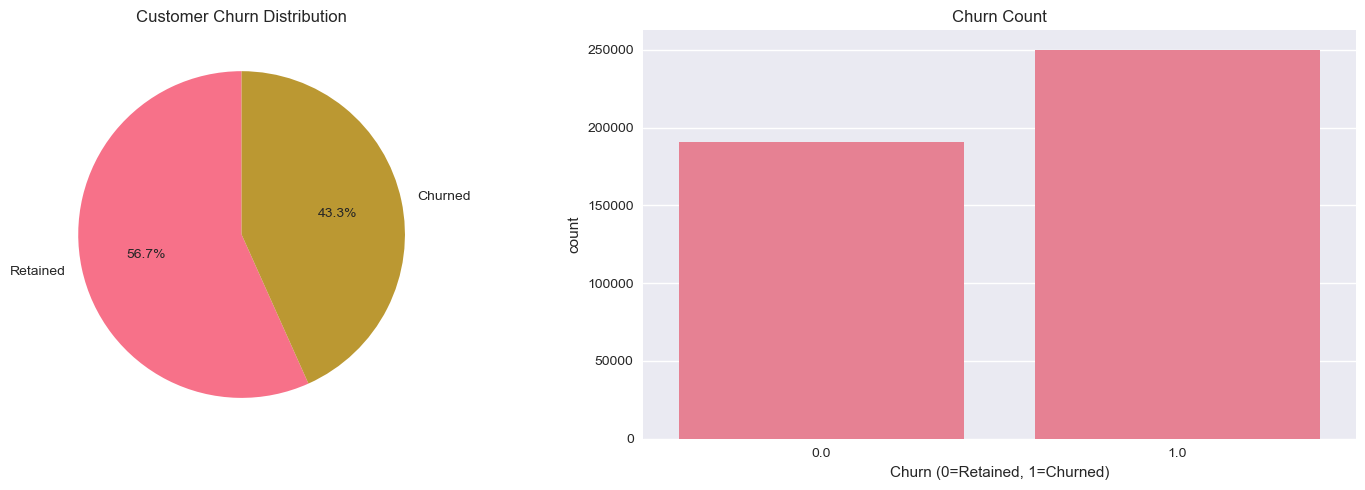

Churn Rate: 56.71%


In [4]:
# Target variable distribution
def plot_target_distribution(df):
    """Plot churn distribution""" 
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Count plot
    churn_counts = df['Churn'].value_counts()
    axes[0].pie(churn_counts.values, labels=['Retained', 'Churned'],
                autopct="%1.1f%%", startangle=90)
    axes[0].set_title("Customer Churn Distribution")
    
    # Bar plot
    sns.countplot(data=df, x="Churn", ax=axes[1])
    axes[1].set_title("Churn Count")
    axes[1].set_xlabel("Churn (0=Retained, 1=Churned)")
    
    plt.tight_layout()
    plt.show()
    
    print(f"Churn Rate: {(df['Churn'].sum() / len(df)) * 100:.2f}%")
    
plot_target_distribution(train_df)

📊 Numerical Features: ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']


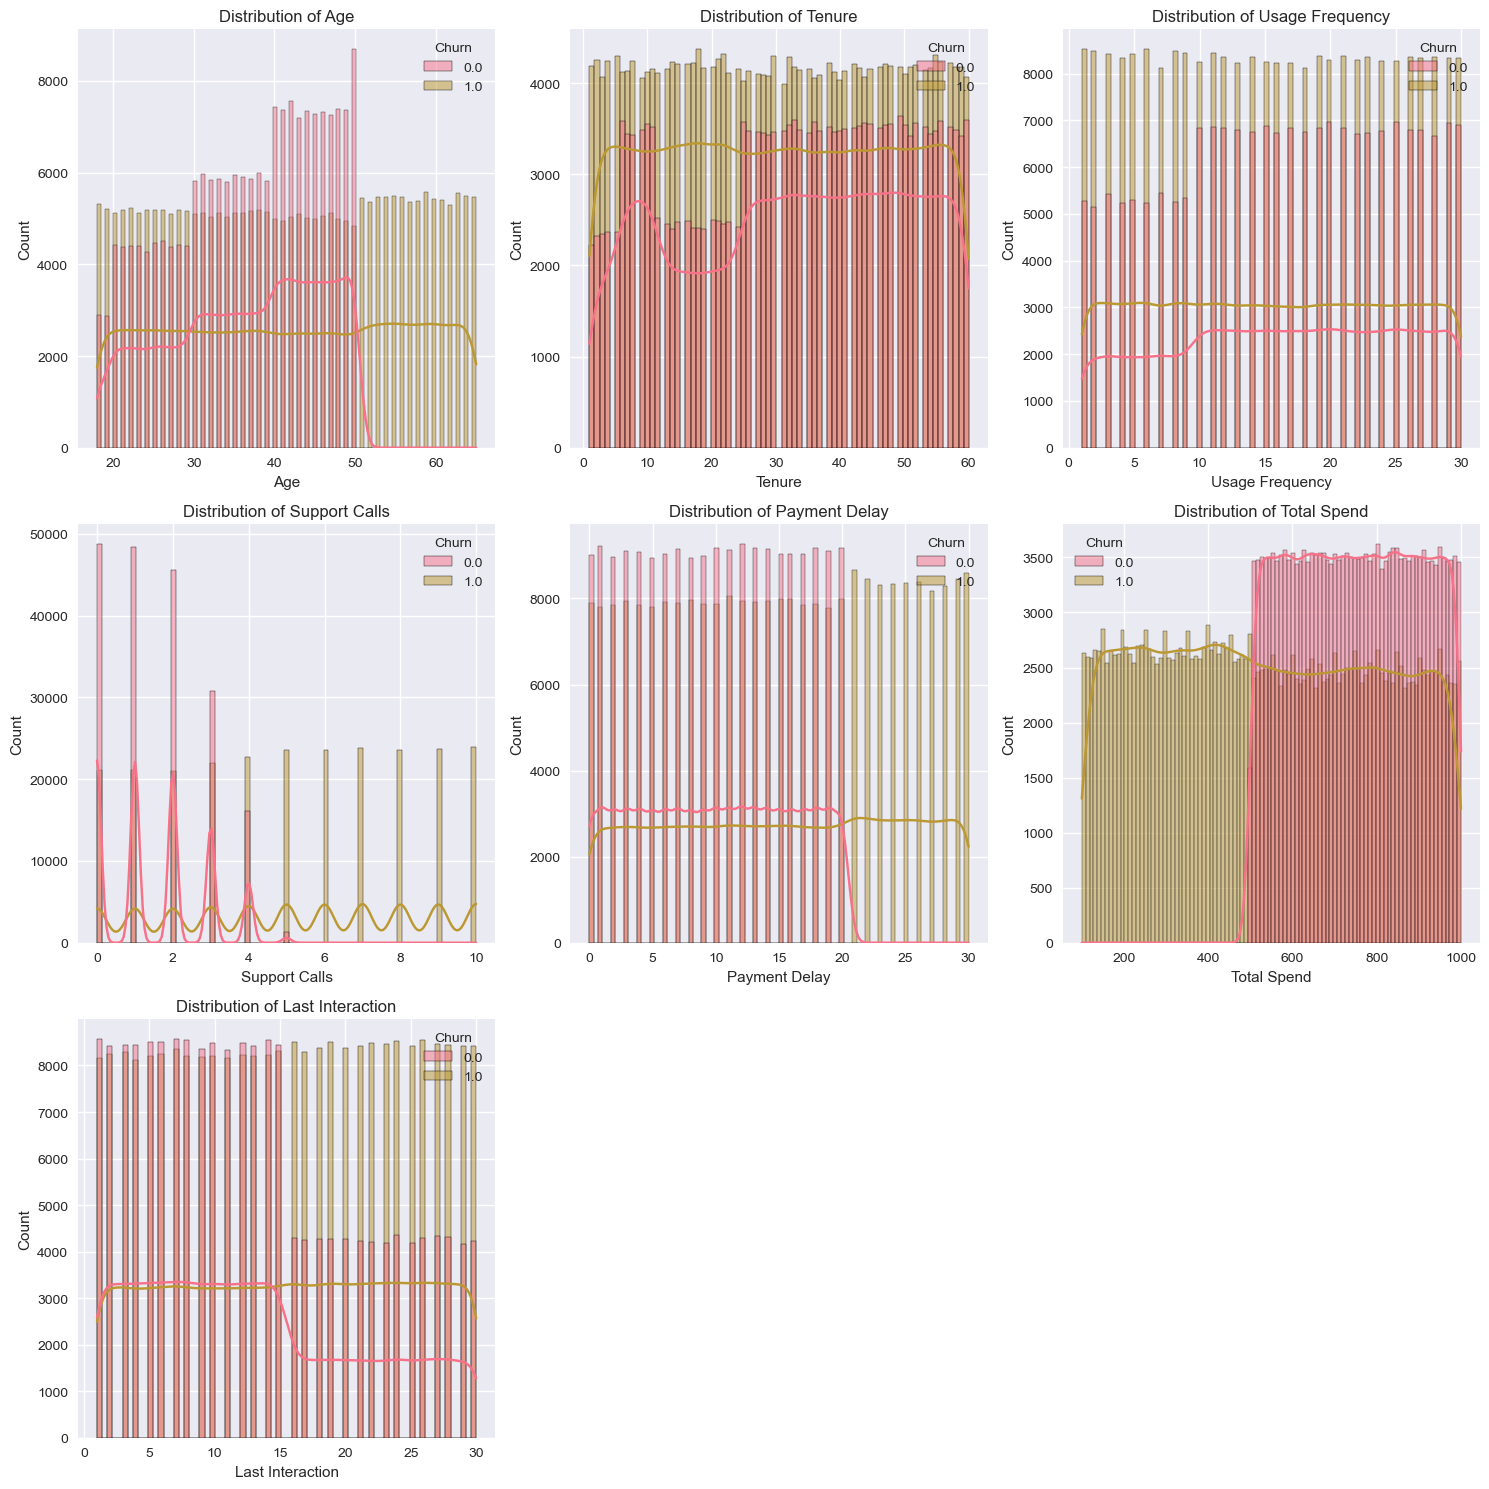

In [5]:
# Numerical features analysis
def analyze_numerical_features(df):
    """Analyze numerical features""" 
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numerical_cols.remove("CustomerID") # Remove ID column
    if 'Churn' in numerical_cols:
        numerical_cols.remove("Churn") # Remove target
    
    print(f"📊 Numerical Features: {numerical_cols}")
    
    # Distribution plots
    n_cols = 3
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes 
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            sns.histplot(data=df, x=col, hue='Churn', kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}')
            
    # Hide empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    return numerical_cols


numerical_features = analyze_numerical_features(train_df)

📊 Categorical Features: ['Gender', 'Subscription Type', 'Contract Length']

Gender - Unique Values: 2
Gender
Male      250252
Female    190580
Name: count, dtype: int64


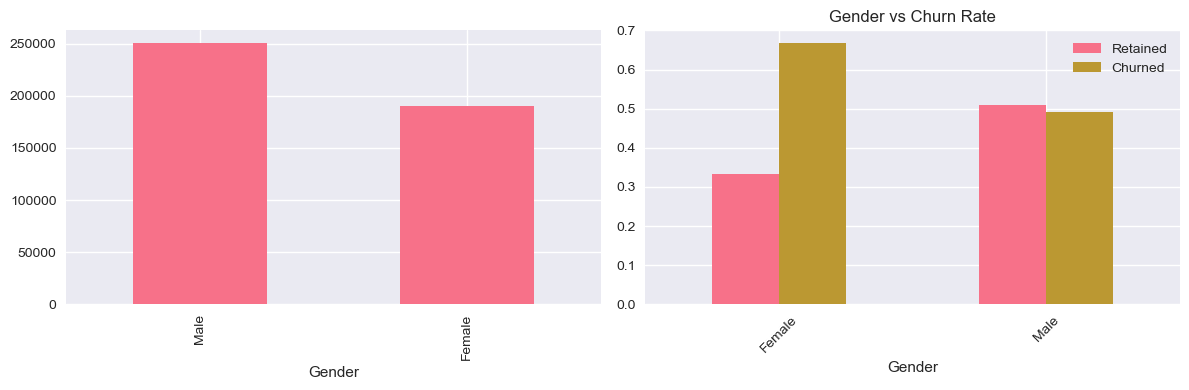


Subscription Type - Unique Values: 3
Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64


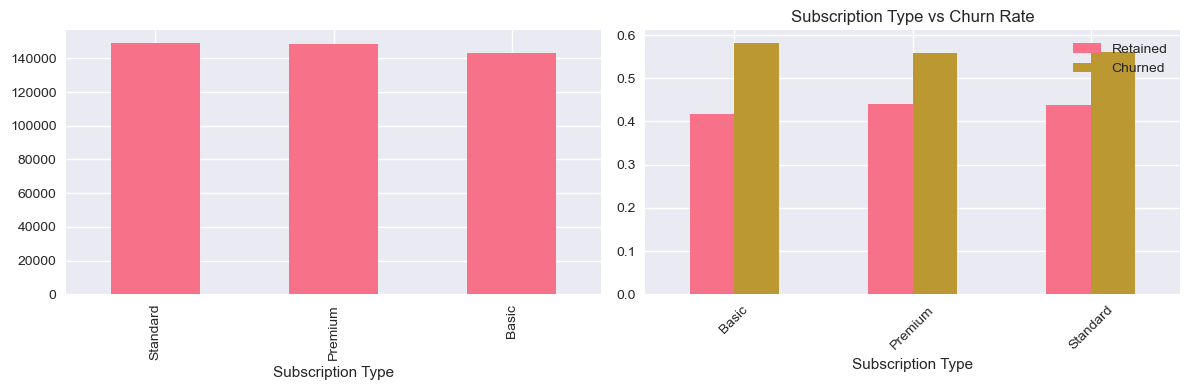


Contract Length - Unique Values: 3
Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64


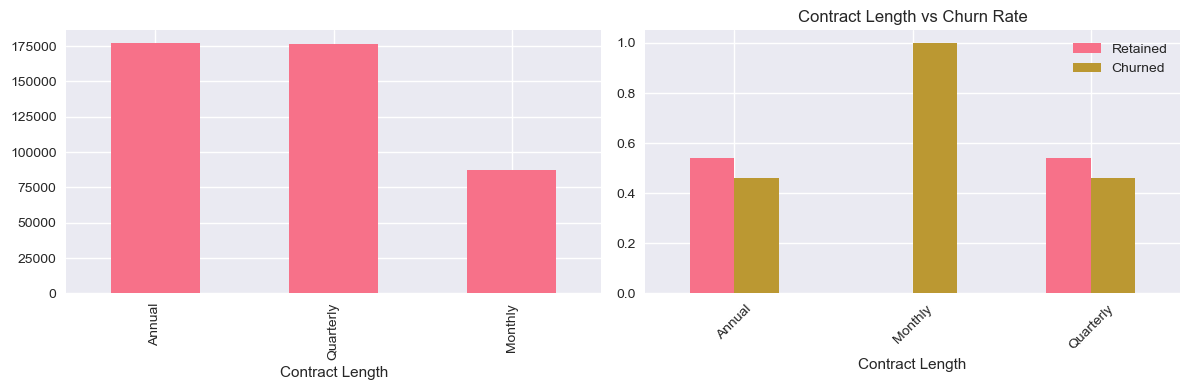

In [6]:
# Categorical features analysis
def analyze_categorical_features(df):
    """Analyze categorical features""" 
    categorical_cols = df.select_dtypes(include=['O']).columns.tolist()
    
    print(f"📊 Categorical Features: {categorical_cols}")
    
    for col in categorical_cols:
        print(f"\n{col} - Unique Values: {df[col].nunique()}")
        print(df[col].value_counts())
        
        # Plot
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        # plt.subplot(1, 2, 1)
        df[col].value_counts().plot(kind='bar', ax=axes[0])
        plt.title(f'{col} Distribution')
        plt.xticks(rotation=45)
        
        # plt.subplot(1, 2, 2)
        pd.crosstab(df[col], df['Churn'], normalize='index').plot(kind='bar', ax=axes[1])
        plt.title(f'{col} vs Churn Rate')
        plt.xticks(rotation=45)
        plt.legend(['Retained', 'Churned'], loc='best')
        
        plt.tight_layout()
        plt.show()
    
    return categorical_cols 


cateorical_features = analyze_categorical_features(train_df)

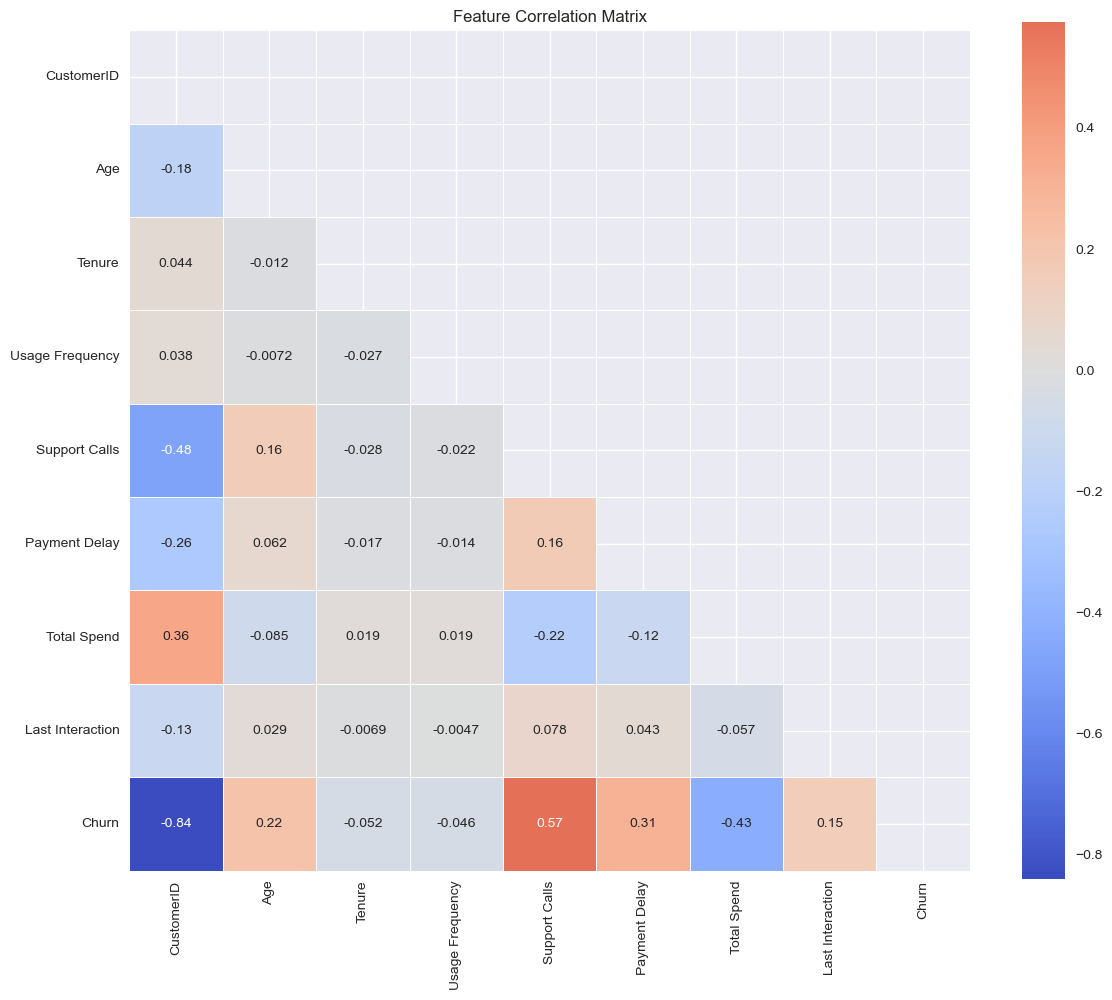

In [7]:
# Correlation matrix
def plot_correlation_matrix(df):
    """Plot correlation matrix for numerical features""" 
    numerical_df = df.select_dtypes(include=[np.number])
    
    plt.figure(figsize=(12, 10))
    correlation_matrix = numerical_df.corr()
    
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
                center=0, square=True, linewidths=0.5)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # High correlations
    high_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j] > 0.7):
                high_corr.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    correlation_matrix.iloc[i, j]
                ))
    
    if high_corr:
        print("🔍 High Correlations (>0.7):")
        for feat1, feat2, corr in high_corr:
            print(f"{feat1} - {feat2}: {corr:.3f}")
    
    return correlation_matrix


correlation_matrix = plot_correlation_matrix(train_df)

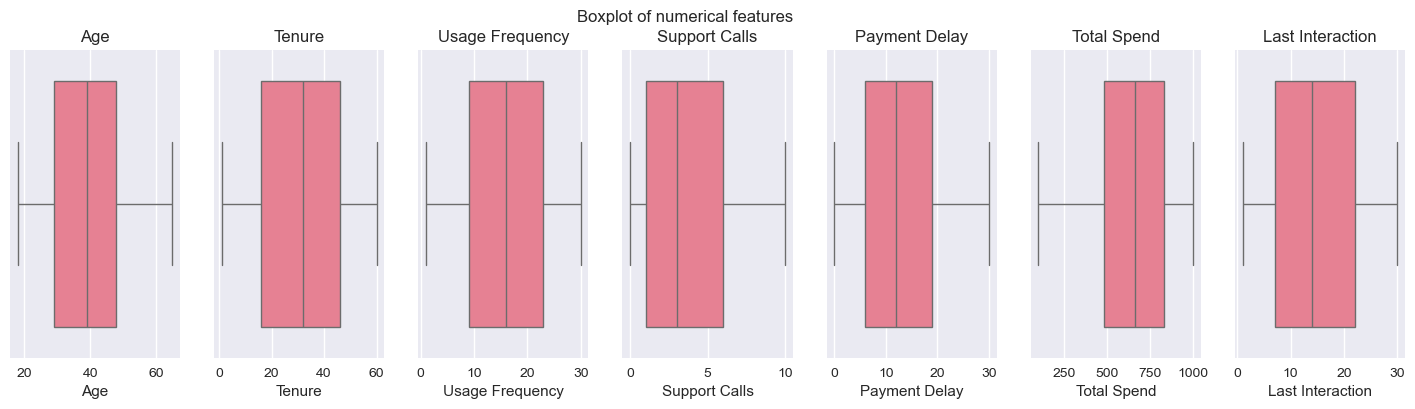

In [8]:
numerical_cols = [col for col in train_df.select_dtypes(include=[np.number]).columns.tolist() if col != 'CustomerID' and col != 'Churn' ]

fig, axes = plt.subplots(1, len(numerical_cols), figsize=(18, 4))
for i, col in enumerate(numerical_cols):
    plt.suptitle('Boxplot of numerical features')
    plt.title(f'Boxplot of {col}')
    sns.boxplot(x=col, data=train_df, ax=axes[i])
    axes[i].set_title(col)
plt.show()

# 6. Preprocessing

In [9]:
# Definisikan kolom numerik dan kategorikal

train_df = train_df.copy()


numeric_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = train_df.select_dtypes(include=['O']).columns.tolist()

# Hapus 'CustomerID' dan 'Churn' dari fitur numerik jika ada
if 'CustomerID' in numeric_features:
    numeric_features.remove('CustomerID')

if 'Churn' in numeric_features:
    numeric_features.remove('Churn')
    
# Buat pipeline unutk preprocessing numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Mengisi missing values dengan mean
    ('scaler', StandardScaler()) # Scaling fitur numerik
])

# Buat pipeline untuk preprocessing kategorikal
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Mengisi missing values dengan modus
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-hot encoding fitur kategorikal
])

# Gabungkan preprocessing untuk kolom numerik dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


train_df_preprocessing = preprocessor.fit_transform(train_df)
test_df_preprocessing = preprocessor.transform(test_df)

# Buat DataFrame dari hasil preprocessing
train_df_preprocessing = pd.DataFrame(train_df_preprocessing)
test_df_preprocessing = pd.DataFrame(test_df_preprocessing)

In [10]:
train_df_preprocessing.to_csv('./preprocessing_dataset/train_df_preprocessing.csv', index=False)
test_df_preprocessing.to_csv('./preprocessing_dataset/test_df_preprocessing.csv', index=False)

# 7. Modeling & Evaluation

### 1. Setup MLflow Experiment

In [11]:
# Set experiment name
experiment_name = "customer_churn_prediction_notebook_edition"
mlflow.set_experiment(experiment_name)

print(f"MLflow experiment '{experiment_name}' is ready!")
print(f"MLflow tracking URI: {mlflow.get_tracking_uri()}")

MLflow experiment 'customer_churn_prediction_notebook_edition' is ready!
MLflow tracking URI: http://localhost:5000


### 2. Prepare Data for Modeling

In [12]:
# Prepare features and target
X_train = train_df_preprocessing
y_train = train_df['Churn'].fillna(0) # Handle missing values

X_test = test_df_preprocessing
y_test = test_df['Churn'].fillna(0)

print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')
print('Target distribution in training set:')
print(y_train.value_counts(normalize=True))

Training set shape: (440833, 15)
Test set shape: (64374, 15)
Target distribution in training set:
Churn
1.0    0.567106
0.0    0.432894
Name: proportion, dtype: float64


### 3. Model Training Function with MLflow

In [13]:
def train_and_log_model(model, model_name, X_train, y_train, X_test, y_test, params=None):
    """
    Train model and log everything to MLflow
    """
    with mlflow.start_run(run_name=model_name):
        # Log parameters
        if params:
            mlflow.log_params(params)
        else:
            mlflow.autolog()
            
        
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Log metrics
        mlflow.log_metric("train_accuracy", train_accuracy)
        mlflow.log_metric("test_accuracy", test_accuracy)
        
        # Classification report
        train_report = classification_report(y_train, y_train_pred, output_dict=True)
        test_report = classification_report(y_test, y_test_pred, output_dict=True)
        
        # Log additional metrics
        mlflow.log_metric("train_precision", train_report['weighted avg']['precision'])
        mlflow.log_metric("train_recall", train_report['weighted avg']['recall'])
        mlflow.log_metric("train_f1", train_report['weighted avg']['f1-score'])
        
        mlflow.log_metric("test_precision", test_report['weighted avg']['precision'])
        mlflow.log_metric("test_recall", test_report['weighted avg']['recall'])
        mlflow.log_metric("test_f1", test_report['weighted avg']['f1-score'])
        
        # Create and log confusion matrix
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_test_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.savefig(f'./images/confusion_matrix_{model_name}.png')
        mlflow.log_artifact(f'./images/confusion_matrix_{model_name}.png')
        plt.show()
        
        # Log model
        signature = infer_signature(X_train, y_train_pred)
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path="model",
            signature=signature,
            registered_model_name=f"churn_prediction_{model_name}"
        )
        
        print(f"\n{'='*50}")
        print(f"MODEL: {model_name}")
        print(f"{'='*50}")
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"Test Precision: {test_report['weighted avg']['precision']:.4f}")
        print(f"Test Recall: {test_report['weighted avg']['recall']:.4f}")
        print(f"Test F1-Score: {test_report['weighted avg']['f1-score']:.4f}")
        
        return model, test_accuracy

### 4. Train Multiple Models


Training Logistic_Regression...


2025/06/05 18:47:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/06/05 18:47:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


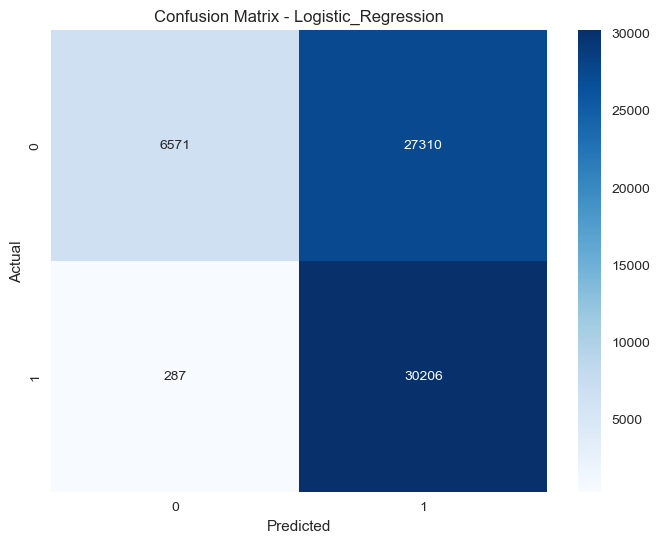

Registered model 'churn_prediction_Logistic_Regression' already exists. Creating a new version of this model...
2025/06/05 18:48:09 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: churn_prediction_Logistic_Regression, version 5
Created version '5' of model 'churn_prediction_Logistic_Regression'.
2025/06/05 18:48:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.



MODEL: Logistic_Regression
Train Accuracy: 0.8954
Test Accuracy: 0.5713
Test Precision: 0.7531
Test Recall: 0.5713
Test F1-Score: 0.4949
🏃 View run Logistic_Regression at: http://localhost:5000/#/experiments/108978616388573352/runs/aace41b27ac8442d914aa30fba9ba0e2
🧪 View experiment at: http://localhost:5000/#/experiments/108978616388573352

Training Decision_Tree...


2025/06/05 18:48:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


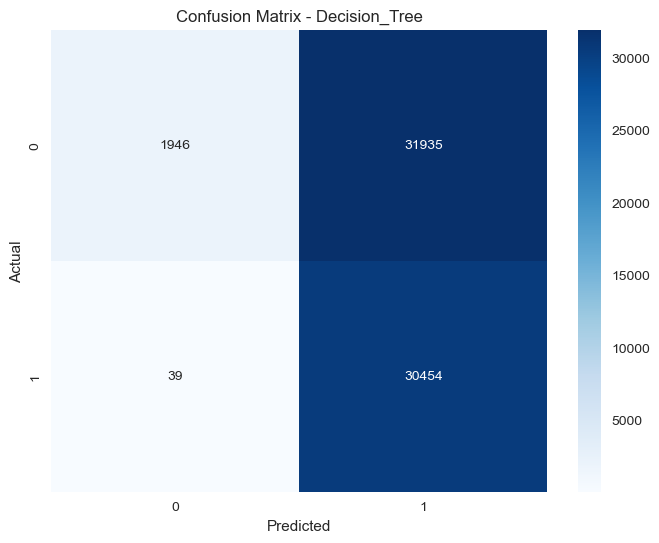

Registered model 'churn_prediction_Decision_Tree' already exists. Creating a new version of this model...
2025/06/05 18:48:59 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: churn_prediction_Decision_Tree, version 4
Created version '4' of model 'churn_prediction_Decision_Tree'.
2025/06/05 18:49:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.



MODEL: Decision_Tree
Train Accuracy: 1.0000
Test Accuracy: 0.5033
Test Precision: 0.7472
Test Recall: 0.5033
Test F1-Score: 0.3677
🏃 View run Decision_Tree at: http://localhost:5000/#/experiments/108978616388573352/runs/bf32f65c6c214d3796d4470052b81642
🧪 View experiment at: http://localhost:5000/#/experiments/108978616388573352

Training Random_Forest...


2025/06/05 18:49:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


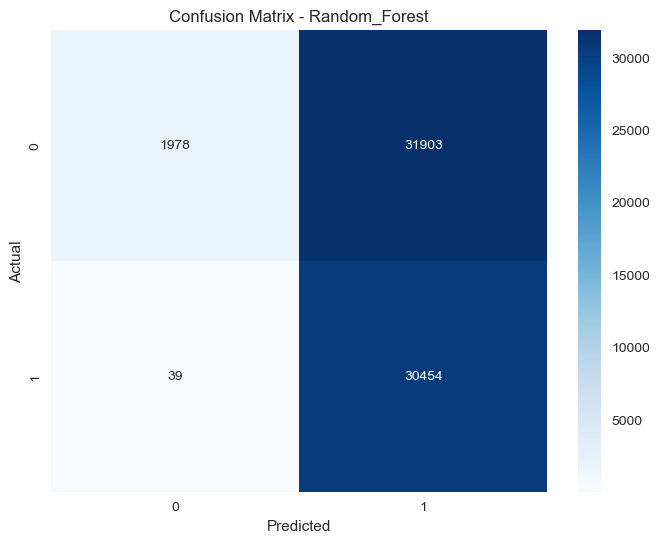

Registered model 'churn_prediction_Random_Forest' already exists. Creating a new version of this model...
2025/06/05 18:51:08 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: churn_prediction_Random_Forest, version 4
Created version '4' of model 'churn_prediction_Random_Forest'.



MODEL: Random_Forest
Train Accuracy: 1.0000
Test Accuracy: 0.5038
Test Precision: 0.7475
Test Recall: 0.5038
Test F1-Score: 0.3687
🏃 View run Random_Forest at: http://localhost:5000/#/experiments/108978616388573352/runs/29ceeb82d7da4db6886c89edd3babe9e
🧪 View experiment at: http://localhost:5000/#/experiments/108978616388573352

Training Gradient_Boosting...


2025/06/05 18:51:08 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/06/05 18:51:08 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


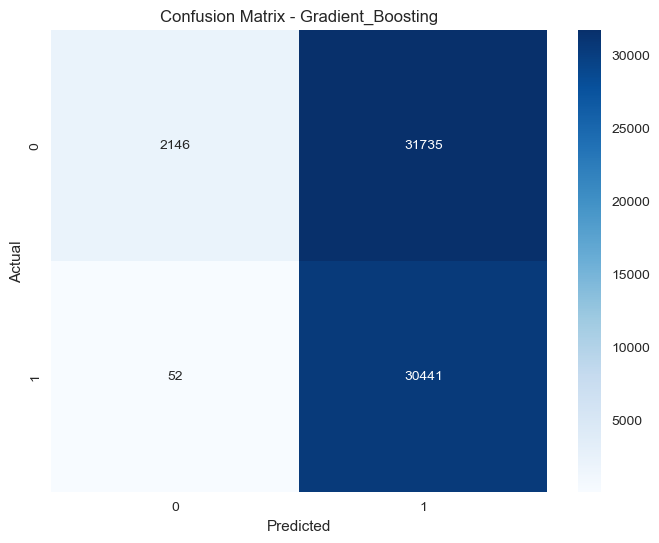

Registered model 'churn_prediction_Gradient_Boosting' already exists. Creating a new version of this model...
2025/06/05 18:53:40 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: churn_prediction_Gradient_Boosting, version 4
Created version '4' of model 'churn_prediction_Gradient_Boosting'.
2025/06/05 18:53:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.



MODEL: Gradient_Boosting
Train Accuracy: 0.9968
Test Accuracy: 0.5062
Test Precision: 0.7458
Test Recall: 0.5062
Test F1-Score: 0.3738
🏃 View run Gradient_Boosting at: http://localhost:5000/#/experiments/108978616388573352/runs/be893a0c70654bdbbf950c42eba14267
🧪 View experiment at: http://localhost:5000/#/experiments/108978616388573352

Training Ada_Boosting...


2025/06/05 18:53:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


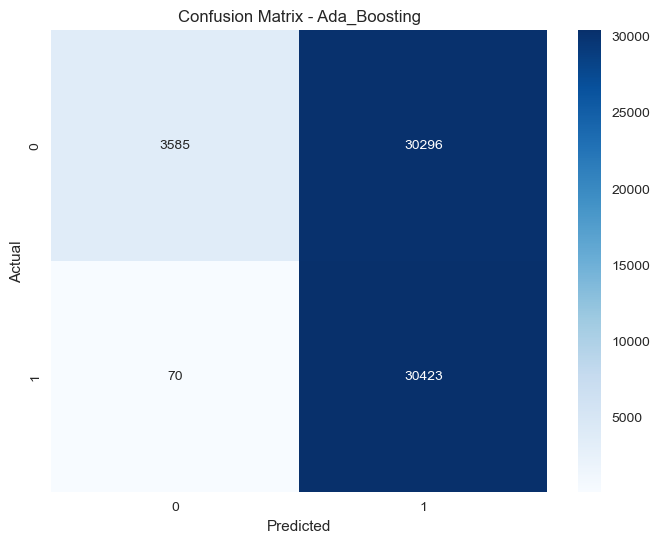

Registered model 'churn_prediction_Ada_Boosting' already exists. Creating a new version of this model...
2025/06/05 18:55:05 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: churn_prediction_Ada_Boosting, version 2



MODEL: Ada_Boosting
Train Accuracy: 0.9745
Test Accuracy: 0.5283
Test Precision: 0.7536
Test Recall: 0.5283
Test F1-Score: 0.4165
🏃 View run Ada_Boosting at: http://localhost:5000/#/experiments/108978616388573352/runs/1ad29c8c16ed49349a015ddffd75fd7a
🧪 View experiment at: http://localhost:5000/#/experiments/108978616388573352


Created version '2' of model 'churn_prediction_Ada_Boosting'.


In [14]:
# Initialize models
models = {
    'Logistic_Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision_Tree': DecisionTreeClassifier(random_state=42),
    'Random_Forest': RandomForestClassifier(random_state=42),
    'Gradient_Boosting': GradientBoostingClassifier(random_state=42),
    'Ada_Boosting': AdaBoostClassifier(random_state=42)
}

# Model parameters for logging
model_params = {
    'Logistic_Regression': {'max_iter': 1000, 'random_state': 42},
    'Decision_Tree': {'random_state': 42},
    'Random_Forest': {'random_state': 42},
    'Gradient_Boosting': {'random_state': 42},
    'Ada_Boosting': {'random_state': 42}
}

# Train all models
trained_models = {}
model_scores = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    trained_model, score = train_and_log_model(
        model=model,
        model_name=model_name,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        
    )
    trained_models[model_name] = trained_model
    model_scores[model_name] = score

### 5. Model Comparison

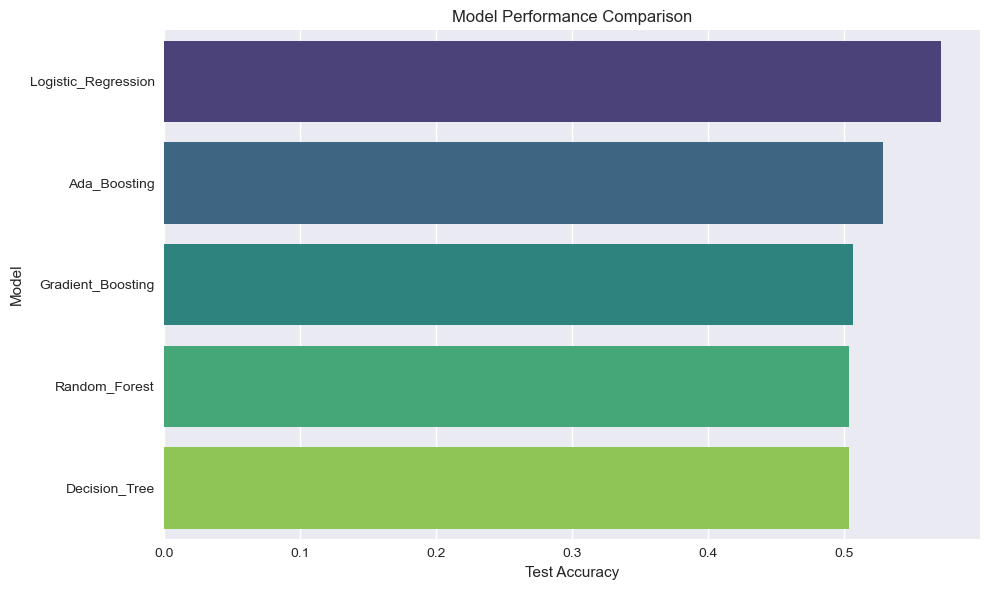


📊 MODEL PERFORMANCE RANKING:
Logistic_Regression: 0.5713
Ada_Boosting: 0.5283
Gradient_Boosting: 0.5062
Random_Forest: 0.5038
Decision_Tree: 0.5033


In [22]:
# Compare model performances
def compare_models(model_scores):
    """Compare model performances"""
    results_df = pd.DataFrame(list(model_scores.items()),
                              columns=['Model', 'Test_Accuracy'])
    results_df = results_df.sort_values('Test_Accuracy', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=results_df, x='Test_Accuracy', y='Model', palette='viridis')
    plt.title('Model Performance Comparison')
    plt.xlabel('Test Accuracy')
    plt.tight_layout()
    plt.savefig('./images/model_performance_comparison.png')
    plt.show()
    
    print("\n📊 MODEL PERFORMANCE RANKING:")
    print("="*40)
    for idx, row in results_df.iterrows():
        print(f"{row['Model']}: {row['Test_Accuracy']:.4f}")
    
    return results_df

results_df = compare_models(model_scores)

### 6. Hyperparameter Tuning dengan Optuna dan MLflow

In [16]:
# Fungsi objektif untuk Optuna - Logistic Regression
def objective_logistic_regression(trial):
    experiment_name = "Logistic_Regression_Optuna_Notebook"
    mlflow.set_experiment(experiment_name)
    # Definisikan parameter yang akan dioptimasi
    C = trial.suggest_float('C', 0.001, 10.0, log=True)
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    
    # Buat pipeline dengan preprocessing dan model
    model = LogisticRegression(C=C, solver=solver, penalty=penalty, max_iter=max_iter)
    
    # Train dan evaluasi
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Log to MLflow
    with mlflow.start_run(run_name=f"Logistic_Regression_Optuna_Trial_{trial.number}"):
        mlflow.log_params({
            'C': C,
            'solver': solver,
            'penalty': penalty,
            'max_iter': max_iter
        })
        mlflow.log_metric('test_accuracy', accuracy)
        mlflow.log_metric('trial_number', trial.number)
    return accuracy 

    

In [17]:
# Buat studi Optuna
print("Starting hyperparameter optimization with Optuna...")
study_lr = optuna.create_study(direction='maximize')

# Jalankan optimasi
print("Optimizing Logistic Regression Hyperparameters...")
study_lr.optimize(objective_logistic_regression, n_trials=50)

# Tampilan hasil terbaik
print("\nBest Logistic Regression parameters:")
print(study_lr.best_params)
print(f"Best accuracy: {study_lr.best_value:.4f}")



[I 2025-06-05 18:55:05,740] A new study created in memory with name: no-name-de40b802-4d15-467f-a322-a3c4ea8bde96
2025/06/05 18:55:05 INFO mlflow.tracking.fluent: Experiment with name 'Logistic_Regression_Optuna_Notebook' does not exist. Creating a new experiment.
2025/06/05 18:55:05 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1e5c2fdc2f534282bc8a3810c844f166', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Starting hyperparameter optimization with Optuna...
Optimizing Logistic Regression Hyperparameters...
🏃 View run monumental-zebra-770 at: http://localhost:5000/#/experiments/955527013218036458/runs/1e5c2fdc2f534282bc8a3810c844f166
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 18:55:29,568] Trial 0 finished with value: 0.5712554758132166 and parameters: {'C': 0.011692800154072312, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 273}. Best is trial 0 with value: 0.5712554758132166.
2025/06/05 18:55:29 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd1807bda5cf54db2a4851d89844c76a1', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_0 at: http://localhost:5000/#/experiments/955527013218036458/runs/49ac2cb73f124285b7c1b956037f3819
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run flawless-goose-887 at: http://localhost:5000/#/experiments/955527013218036458/runs/d1807bda5cf54db2a4851d89844c76a1
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 18:55:52,267] Trial 1 finished with value: 0.5712088731475441 and parameters: {'C': 2.7572818966026764, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 597}. Best is trial 0 with value: 0.5712554758132166.
2025/06/05 18:55:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2cbb8f8047a74b758e46c64a33a110c4', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_1 at: http://localhost:5000/#/experiments/955527013218036458/runs/c9a85012de7e412a83ffcca7d30ea96f
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run unequaled-bat-13 at: http://localhost:5000/#/experiments/955527013218036458/runs/2cbb8f8047a74b758e46c64a33a110c4
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 18:56:14,370] Trial 2 finished with value: 0.5712244073694349 and parameters: {'C': 1.6295968050433074, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 407}. Best is trial 0 with value: 0.5712554758132166.
2025/06/05 18:56:14 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '91caaf839b634112aae309caf57317a8', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_2 at: http://localhost:5000/#/experiments/955527013218036458/runs/0627a51b4f5348378f9f7dfe994879cf
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run skillful-fish-847 at: http://localhost:5000/#/experiments/955527013218036458/runs/91caaf839b634112aae309caf57317a8
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 18:56:39,298] Trial 3 finished with value: 0.571115667816199 and parameters: {'C': 0.011986350639071771, 'solver': 'saga', 'penalty': 'l1', 'max_iter': 499}. Best is trial 0 with value: 0.5712554758132166.
2025/06/05 18:56:39 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2a56daafcaf54e429bf3ec1bbddcb03c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_3 at: http://localhost:5000/#/experiments/955527013218036458/runs/fe7b43daec1447d8b3950d51010d9587
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run omniscient-owl-876 at: http://localhost:5000/#/experiments/955527013218036458/runs/2a56daafcaf54e429bf3ec1bbddcb03c
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 18:57:01,567] Trial 4 finished with value: 0.5729642402212073 and parameters: {'C': 0.0010241806126609833, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 519}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 18:57:01 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'edb8d7975c964fc889e2d2ac6711a48f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_4 at: http://localhost:5000/#/experiments/955527013218036458/runs/2a404126586742caa7c141f202627b17
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run gaudy-dove-989 at: http://localhost:5000/#/experiments/955527013218036458/runs/edb8d7975c964fc889e2d2ac6711a48f
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 18:57:58,429] Trial 5 finished with value: 0.5712088731475441 and parameters: {'C': 8.371088673152899, 'solver': 'saga', 'penalty': 'l1', 'max_iter': 127}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 18:57:58 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'afc884f7015e4e3da4d99e829a05097e', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_5 at: http://localhost:5000/#/experiments/955527013218036458/runs/d4aa32e0fcc94d03867d130d1b109d3c
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run enthused-wolf-997 at: http://localhost:5000/#/experiments/955527013218036458/runs/afc884f7015e4e3da4d99e829a05097e
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 18:58:21,046] Trial 6 finished with value: 0.5711622704818715 and parameters: {'C': 0.03135807775217108, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 781}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 18:58:21 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b9d0e504694a461894e0f3d7e8610824', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_6 at: http://localhost:5000/#/experiments/955527013218036458/runs/dce7fd78621f4de28d94149ee0eca792
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run stately-dolphin-77 at: http://localhost:5000/#/experiments/955527013218036458/runs/b9d0e504694a461894e0f3d7e8610824
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 18:58:43,129] Trial 7 finished with value: 0.5721564606828844 and parameters: {'C': 0.001666704906612072, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 643}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 18:58:43 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'dda0918101a34579ae78e09928ee6080', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_7 at: http://localhost:5000/#/experiments/955527013218036458/runs/be569768b90f46d496238c167efad138
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run upset-lark-191 at: http://localhost:5000/#/experiments/955527013218036458/runs/dda0918101a34579ae78e09928ee6080
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 18:59:08,527] Trial 8 finished with value: 0.5715816944729238 and parameters: {'C': 0.0016204262092651867, 'solver': 'saga', 'penalty': 'l2', 'max_iter': 733}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 18:59:08 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'cdba79af8f294134a569857b277a3100', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_8 at: http://localhost:5000/#/experiments/955527013218036458/runs/c108ac9de7254e4da546c178fdce91ac
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run youthful-bass-551 at: http://localhost:5000/#/experiments/955527013218036458/runs/cdba79af8f294134a569857b277a3100
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 18:59:31,173] Trial 9 finished with value: 0.5712088731475441 and parameters: {'C': 1.5835417692351803, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 528}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 18:59:31 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1502975cf00b445abcfd457dfd1bed3d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_9 at: http://localhost:5000/#/experiments/955527013218036458/runs/c5cc7d5fbb874e07885362ec6103023d
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run learned-doe-613 at: http://localhost:5000/#/experiments/955527013218036458/runs/1502975cf00b445abcfd457dfd1bed3d
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:00:06,306] Trial 10 finished with value: 0.5712244073694349 and parameters: {'C': 0.2694488901766183, 'solver': 'saga', 'penalty': 'l1', 'max_iter': 943}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:00:06 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1a54deb501844d4e915e3499f7145dba', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_10 at: http://localhost:5000/#/experiments/955527013218036458/runs/2f53dee78823470eaaa784486cc6e136
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run amusing-vole-343 at: http://localhost:5000/#/experiments/955527013218036458/runs/1a54deb501844d4e915e3499f7145dba
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:00:28,535] Trial 11 finished with value: 0.5728710348898624 and parameters: {'C': 0.001051026766017195, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 702}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:00:28 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2b89ba60031e4122abab0e31dede0fb1', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_11 at: http://localhost:5000/#/experiments/955527013218036458/runs/97597fbeefab4a9587158e149ce32068
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run rare-crane-502 at: http://localhost:5000/#/experiments/955527013218036458/runs/2b89ba60031e4122abab0e31dede0fb1
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:00:50,870] Trial 12 finished with value: 0.5728555006679715 and parameters: {'C': 0.0010562246429645444, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 906}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:00:50 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c7c2ea312c7c4f72b9da33ad9bee1848', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_12 at: http://localhost:5000/#/experiments/955527013218036458/runs/10e5872f9cfb420abd2669a9f456bcbf
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run adaptable-bass-879 at: http://localhost:5000/#/experiments/955527013218036458/runs/c7c2ea312c7c4f72b9da33ad9bee1848
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:01:12,980] Trial 13 finished with value: 0.5713797495883431 and parameters: {'C': 0.0064611976760548875, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 361}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:01:13 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e53aa3b59909408090b0c99d9315f994', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_13 at: http://localhost:5000/#/experiments/955527013218036458/runs/9fbeb6e914bd4f4782378c5aaf484960
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run lyrical-perch-726 at: http://localhost:5000/#/experiments/955527013218036458/runs/e53aa3b59909408090b0c99d9315f994
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:01:37,822] Trial 14 finished with value: 0.5712244073694349 and parameters: {'C': 0.08499722238117446, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 755}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:01:37 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3ef4779c90e244f0a6b3492eb3238f3e', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_14 at: http://localhost:5000/#/experiments/955527013218036458/runs/19a4e5412f27443ba1e4c34bd3ed245a
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run polite-moose-23 at: http://localhost:5000/#/experiments/955527013218036458/runs/3ef4779c90e244f0a6b3492eb3238f3e
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:02:01,522] Trial 15 finished with value: 0.5714884891415789 and parameters: {'C': 0.003757261896251676, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 630}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:02:01 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '0dfb6a2b560345c084e8cb38a6d37682', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_15 at: http://localhost:5000/#/experiments/955527013218036458/runs/4a9b9f6abc5e4b55865fedb391a662e3
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run loud-squid-300 at: http://localhost:5000/#/experiments/955527013218036458/runs/0dfb6a2b560345c084e8cb38a6d37682
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:02:28,964] Trial 16 finished with value: 0.5712710100351074 and parameters: {'C': 0.0349241218405195, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 438}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:02:29 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3321919767b3426090352ed2bba8c818', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_16 at: http://localhost:5000/#/experiments/955527013218036458/runs/f2d7cffccb704b77855c89128b06f96b
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run handsome-sheep-37 at: http://localhost:5000/#/experiments/955527013218036458/runs/3321919767b3426090352ed2bba8c818
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:02:52,674] Trial 17 finished with value: 0.5712244073694349 and parameters: {'C': 0.22744942829201042, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 856}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:02:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '25db6d5584cc4305accf28c7e9648647', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_17 at: http://localhost:5000/#/experiments/955527013218036458/runs/14a95f35057d4959af02408eee34e4e8
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run melodic-skunk-454 at: http://localhost:5000/#/experiments/955527013218036458/runs/25db6d5584cc4305accf28c7e9648647
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:03:18,933] Trial 18 finished with value: 0.5711778047037623 and parameters: {'C': 0.0038506204834343315, 'solver': 'saga', 'penalty': 'l2', 'max_iter': 200}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:03:19 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2bf4b86aa538450db65e2db89d312e72', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_18 at: http://localhost:5000/#/experiments/955527013218036458/runs/760851b2f78f45e7bb20a4a30f539661
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run fortunate-mare-476 at: http://localhost:5000/#/experiments/955527013218036458/runs/2bf4b86aa538450db65e2db89d312e72
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:03:43,193] Trial 19 finished with value: 0.5717215024699412 and parameters: {'C': 0.002887172318236588, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 347}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:03:43 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '550b8513465a43c38c88aff19f58c5d5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_19 at: http://localhost:5000/#/experiments/955527013218036458/runs/fc33acd74717402fad7043efb6ff9d96
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run angry-crow-811 at: http://localhost:5000/#/experiments/955527013218036458/runs/550b8513465a43c38c88aff19f58c5d5
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:04:07,064] Trial 20 finished with value: 0.5713176127007799 and parameters: {'C': 0.017999318292265, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 682}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:04:07 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '34f7c3a586ae470bbc3529c2ee1e735f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_20 at: http://localhost:5000/#/experiments/955527013218036458/runs/e138d57da3724de89bac5f134ff3c644
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run magnificent-bird-280 at: http://localhost:5000/#/experiments/955527013218036458/runs/34f7c3a586ae470bbc3529c2ee1e735f
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:04:30,079] Trial 21 finished with value: 0.5729642402212073 and parameters: {'C': 0.001025597128512191, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 1000}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:04:30 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'eab03904ec934ae0b0cdb4df7e832ae8', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_21 at: http://localhost:5000/#/experiments/955527013218036458/runs/8115f322189c49059d54fc10a01f168e
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run fortunate-cow-90 at: http://localhost:5000/#/experiments/955527013218036458/runs/eab03904ec934ae0b0cdb4df7e832ae8
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:04:53,244] Trial 22 finished with value: 0.5726846242271725 and parameters: {'C': 0.0011418889500648243, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 980}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:04:53 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8ed5543e3782477884fa38641914dc23', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_22 at: http://localhost:5000/#/experiments/955527013218036458/runs/40dd8ff881034ce9869353156768abaa
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run shivering-sloth-333 at: http://localhost:5000/#/experiments/955527013218036458/runs/8ed5543e3782477884fa38641914dc23
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:05:16,224] Trial 23 finished with value: 0.5714108180321248 and parameters: {'C': 0.005702877757316894, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 835}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:05:16 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'be4a1d0bf9e747c1ad891240bdf22777', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_23 at: http://localhost:5000/#/experiments/955527013218036458/runs/3564860707f2460fbd5f292f202e2ff9
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run classy-shoat-714 at: http://localhost:5000/#/experiments/955527013218036458/runs/be4a1d0bf9e747c1ad891240bdf22777
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:05:39,692] Trial 24 finished with value: 0.5717059682480504 and parameters: {'C': 0.0025756091107560653, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 568}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:05:39 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4f2425fb940843d291f3c2c69108aa6e', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_24 at: http://localhost:5000/#/experiments/955527013218036458/runs/6ab3169e2a404a8daddf33fc32bdcbef
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run masked-fawn-644 at: http://localhost:5000/#/experiments/955527013218036458/runs/4f2425fb940843d291f3c2c69108aa6e
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:06:03,806] Trial 25 finished with value: 0.5729331717774256 and parameters: {'C': 0.0010388279984278191, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 999}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:06:03 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '738ca618c2b4402193ce7c5f8101b464', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_25 at: http://localhost:5000/#/experiments/955527013218036458/runs/25587f3b6d104ba1b4e820468822972b
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run mercurial-cat-702 at: http://localhost:5000/#/experiments/955527013218036458/runs/738ca618c2b4402193ce7c5f8101b464
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:06:30,287] Trial 26 finished with value: 0.571302078478889 and parameters: {'C': 0.0025694002682464597, 'solver': 'saga', 'penalty': 'l2', 'max_iter': 852}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:06:30 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '33be33d2dfe64630ac20c312fa1610ee', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_26 at: http://localhost:5000/#/experiments/955527013218036458/runs/0c62d57ee35a439a9a27fea924ded386
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run mercurial-sloth-468 at: http://localhost:5000/#/experiments/955527013218036458/runs/33be33d2dfe64630ac20c312fa1610ee
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:06:54,013] Trial 27 finished with value: 0.5712710100351074 and parameters: {'C': 0.007820184920078193, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 968}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:06:54 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3dbdac6097dd4e709a4a21fdb5b4221f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_27 at: http://localhost:5000/#/experiments/955527013218036458/runs/55cc56e3be764aa4be352e619a1ecf6c
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run masked-cub-82 at: http://localhost:5000/#/experiments/955527013218036458/runs/3dbdac6097dd4e709a4a21fdb5b4221f
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:07:18,707] Trial 28 finished with value: 0.5712554758132166 and parameters: {'C': 0.044063690957677384, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 913}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:07:18 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '94f020d8719a429f9043c4a8c3a5cb4a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_28 at: http://localhost:5000/#/experiments/955527013218036458/runs/14d6ff9cebc440f081447b89b24af87e
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run useful-ram-721 at: http://localhost:5000/#/experiments/955527013218036458/runs/94f020d8719a429f9043c4a8c3a5cb4a
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:07:43,287] Trial 29 finished with value: 0.5713176127007799 and parameters: {'C': 0.017127549985641827, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 298}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:07:43 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '980cb7b459954d80bb596c862b053d0d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_29 at: http://localhost:5000/#/experiments/955527013218036458/runs/421527d3975f414a9de2efa5012e752c
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run suave-ape-101 at: http://localhost:5000/#/experiments/955527013218036458/runs/980cb7b459954d80bb596c862b053d0d
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:08:06,517] Trial 30 finished with value: 0.5719700500201945 and parameters: {'C': 0.002037005573528139, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 442}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:08:06 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b71de1e04074484fa478e0c598470806', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_30 at: http://localhost:5000/#/experiments/955527013218036458/runs/1f4d2c5acd0c441aa1fc8b283b6f327d
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run adaptable-grub-947 at: http://localhost:5000/#/experiments/955527013218036458/runs/b71de1e04074484fa478e0c598470806
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:08:30,008] Trial 31 finished with value: 0.5727156926709541 and parameters: {'C': 0.0011264907637882093, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 800}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:08:30 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f960e492fffe4f48bec0faafab560c54', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_31 at: http://localhost:5000/#/experiments/955527013218036458/runs/16eeee02338d4a94b881342b5b849710
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run nervous-vole-129 at: http://localhost:5000/#/experiments/955527013218036458/runs/f960e492fffe4f48bec0faafab560c54
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:08:53,377] Trial 32 finished with value: 0.5714108180321248 and parameters: {'C': 0.004829072966721277, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 990}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:08:53 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '859a5fc14ca9494a94470fb79f710827', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_32 at: http://localhost:5000/#/experiments/955527013218036458/runs/51da967083dc4ea08c5419a8dd9936ff
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run suave-panda-373 at: http://localhost:5000/#/experiments/955527013218036458/runs/859a5fc14ca9494a94470fb79f710827
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:09:17,114] Trial 33 finished with value: 0.5720787895734303 and parameters: {'C': 0.0017599010250292956, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 892}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:09:17 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '49ae604f2d094cb39b51796f7fc1d5aa', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_33 at: http://localhost:5000/#/experiments/955527013218036458/runs/a9b5fcb6761648cfa2562f1a8eaf0a92
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run glamorous-moose-703 at: http://localhost:5000/#/experiments/955527013218036458/runs/49ae604f2d094cb39b51796f7fc1d5aa
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:09:41,312] Trial 34 finished with value: 0.5712399415913257 and parameters: {'C': 0.0097105000944523, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 707}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:09:41 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c466da9521804d2b8568de7efe3ff71f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_34 at: http://localhost:5000/#/experiments/955527013218036458/runs/c2b0dd5c2b3240199ca97349c13cc123
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run puzzled-mole-841 at: http://localhost:5000/#/experiments/955527013218036458/runs/c466da9521804d2b8568de7efe3ff71f
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:10:04,579] Trial 35 finished with value: 0.572731226892845 and parameters: {'C': 0.001125395329836226, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 581}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:10:04 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8141d3e061014cb3af4ed82afa8a6d70', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_35 at: http://localhost:5000/#/experiments/955527013218036458/runs/e6a454771a7c45e196b52e70a33b69c4
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run agreeable-bee-394 at: http://localhost:5000/#/experiments/955527013218036458/runs/8141d3e061014cb3af4ed82afa8a6d70
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:10:30,270] Trial 36 finished with value: 0.5711778047037623 and parameters: {'C': 0.0036049430073765037, 'solver': 'saga', 'penalty': 'l2', 'max_iter': 493}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:10:30 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5958fd49ba8748b9a3479c5de9fa6baa', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_36 at: http://localhost:5000/#/experiments/955527013218036458/runs/55de01e4ea444e52b5dbcc87f8f70223
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run powerful-carp-43 at: http://localhost:5000/#/experiments/955527013218036458/runs/5958fd49ba8748b9a3479c5de9fa6baa
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:10:53,983] Trial 37 finished with value: 0.572016652685867 and parameters: {'C': 0.0018782650132487622, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 649}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:10:54 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '638b5bd102844217b6bd1559238c76ac', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_37 at: http://localhost:5000/#/experiments/955527013218036458/runs/1ed16ce20799427d8447251e69a716ab
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run gregarious-jay-228 at: http://localhost:5000/#/experiments/955527013218036458/runs/638b5bd102844217b6bd1559238c76ac
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:11:16,537] Trial 38 finished with value: 0.5712088731475441 and parameters: {'C': 0.6784462116451273, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 793}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:11:16 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '59b3fbfbe52842a09118f30ca5edea93', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_38 at: http://localhost:5000/#/experiments/955527013218036458/runs/a0fac5d60ffd4edd96dd0f528830833a
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run sassy-cod-191 at: http://localhost:5000/#/experiments/955527013218036458/runs/59b3fbfbe52842a09118f30ca5edea93
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:13:23,682] Trial 39 finished with value: 0.5712088731475441 and parameters: {'C': 8.092285874489571, 'solver': 'saga', 'penalty': 'l2', 'max_iter': 494}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:13:23 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1cf722b5e6f044f3b011a62bd4017610', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_39 at: http://localhost:5000/#/experiments/955527013218036458/runs/435cfeacc0c54bfba11affe3be241cd6
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run traveling-fawn-734 at: http://localhost:5000/#/experiments/955527013218036458/runs/1cf722b5e6f044f3b011a62bd4017610
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:13:47,537] Trial 40 finished with value: 0.5713331469226707 and parameters: {'C': 0.014267394717823798, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 933}. Best is trial 4 with value: 0.5729642402212073.
2025/06/05 19:13:47 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6db58c5fbec54345962f38694010b5a7', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_40 at: http://localhost:5000/#/experiments/955527013218036458/runs/c52ce6edcc38442ca8528bb4cb55ba68
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run fearless-snipe-542 at: http://localhost:5000/#/experiments/955527013218036458/runs/6db58c5fbec54345962f38694010b5a7
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:14:10,090] Trial 41 finished with value: 0.5729797744430981 and parameters: {'C': 0.0010259727323459532, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 890}. Best is trial 41 with value: 0.5729797744430981.
2025/06/05 19:14:10 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '14a0833b3aa444a2862399be2925007e', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_41 at: http://localhost:5000/#/experiments/955527013218036458/runs/7c7580a2a00047b7991100007967bf02
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run sneaky-bird-723 at: http://localhost:5000/#/experiments/955527013218036458/runs/14a0833b3aa444a2862399be2925007e
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:14:33,020] Trial 42 finished with value: 0.5728555006679715 and parameters: {'C': 0.0010599258272856163, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 996}. Best is trial 41 with value: 0.5729797744430981.
2025/06/05 19:14:33 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '309b5b08a8a14c47b2ed1c96813d314d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_42 at: http://localhost:5000/#/experiments/955527013218036458/runs/eab167d9fb6f4b5f900b2c0be6508a46
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run rumbling-whale-66 at: http://localhost:5000/#/experiments/955527013218036458/runs/309b5b08a8a14c47b2ed1c96813d314d
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:14:56,179] Trial 43 finished with value: 0.5721719949047752 and parameters: {'C': 0.001674162595143149, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 877}. Best is trial 41 with value: 0.5729797744430981.
2025/06/05 19:14:56 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c4fe9716b57a4fa7add2577e64d603d9', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_43 at: http://localhost:5000/#/experiments/955527013218036458/runs/3566716fe6e74af8907101fe1de5a267
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run stylish-hound-288 at: http://localhost:5000/#/experiments/955527013218036458/runs/c4fe9716b57a4fa7add2577e64d603d9
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:15:19,409] Trial 44 finished with value: 0.5717991735793954 and parameters: {'C': 0.002394161067065129, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 943}. Best is trial 41 with value: 0.5729797744430981.
2025/06/05 19:15:19 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '880c06213db24145b76dedff70476bde', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_44 at: http://localhost:5000/#/experiments/955527013218036458/runs/34ff22bf615242e893c78c39c7426b3d
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run useful-midge-616 at: http://localhost:5000/#/experiments/955527013218036458/runs/880c06213db24145b76dedff70476bde
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:15:42,759] Trial 45 finished with value: 0.5723118029017926 and parameters: {'C': 0.0015063885218127222, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 757}. Best is trial 41 with value: 0.5729797744430981.
2025/06/05 19:15:42 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f72f6cac41994094b711f4b790a12cf5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_45 at: http://localhost:5000/#/experiments/955527013218036458/runs/1c57ccd70258449fb34296b0a9b941bf
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run carefree-dog-504 at: http://localhost:5000/#/experiments/955527013218036458/runs/f72f6cac41994094b711f4b790a12cf5
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:16:06,364] Trial 46 finished with value: 0.5714108180321248 and parameters: {'C': 0.0048281159113837905, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 939}. Best is trial 41 with value: 0.5729797744430981.
2025/06/05 19:16:06 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'cb789d29ec564bddbfc763ecad51afa5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_46 at: http://localhost:5000/#/experiments/955527013218036458/runs/357a9804c4ac421e87629f15900c6695
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run capricious-lamb-129 at: http://localhost:5000/#/experiments/955527013218036458/runs/cb789d29ec564bddbfc763ecad51afa5
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:16:33,413] Trial 47 finished with value: 0.5723428713455743 and parameters: {'C': 0.0010019517927968961, 'solver': 'saga', 'penalty': 'l2', 'max_iter': 803}. Best is trial 41 with value: 0.5729797744430981.
2025/06/05 19:16:33 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2827974c8b9545c09022bdd4637cf043', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_47 at: http://localhost:5000/#/experiments/955527013218036458/runs/837acb7f58c849ee8a53bd26cc9796f5
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run shivering-yak-500 at: http://localhost:5000/#/experiments/955527013218036458/runs/2827974c8b9545c09022bdd4637cf043
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:16:56,775] Trial 48 finished with value: 0.5715816944729238 and parameters: {'C': 0.0033109791090772324, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 828}. Best is trial 41 with value: 0.5729797744430981.
2025/06/05 19:16:56 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'cec425f705d14822b879ba188425e221', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run Logistic_Regression_Optuna_Trial_48 at: http://localhost:5000/#/experiments/955527013218036458/runs/d8ad29b48e874584a0c1d0354fa9ff4c
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458
🏃 View run youthful-rat-355 at: http://localhost:5000/#/experiments/955527013218036458/runs/cec425f705d14822b879ba188425e221
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


[I 2025-06-05 19:17:20,234] Trial 49 finished with value: 0.5722962686799018 and parameters: {'C': 0.0015050790433977505, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 532}. Best is trial 41 with value: 0.5729797744430981.


🏃 View run Logistic_Regression_Optuna_Trial_49 at: http://localhost:5000/#/experiments/955527013218036458/runs/6b2d82fcedcb428192f809b827169c7a
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458

Best Logistic Regression parameters:
{'C': 0.0010259727323459532, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 890}
Best accuracy: 0.5730


### 7. Train Best Model

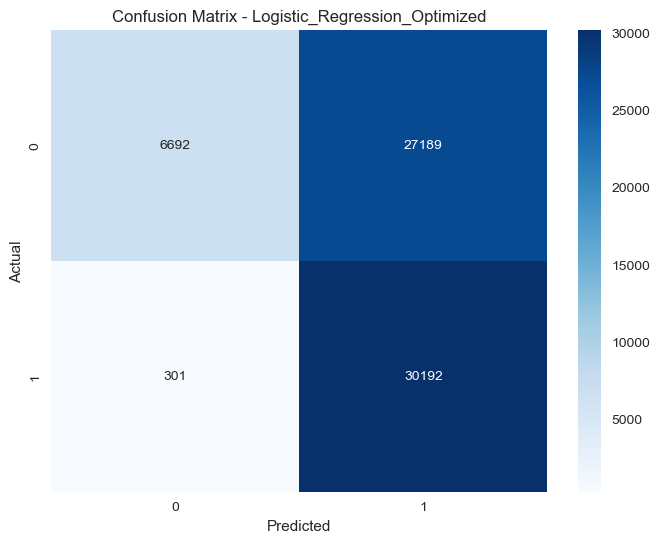

Successfully registered model 'churn_prediction_Logistic_Regression_Optimized'.
2025/06/05 19:31:24 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: churn_prediction_Logistic_Regression_Optimized, version 1



MODEL: Logistic_Regression_Optimized
Train Accuracy: 0.8955
Test Accuracy: 0.5730
Test Precision: 0.7529
Test Recall: 0.5730
Test F1-Score: 0.4978
🏃 View run Logistic_Regression_Optimized at: http://localhost:5000/#/experiments/955527013218036458/runs/c2aa115770fa461e8f95660809b4e82d
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458

🏆 BEST MODEL PERFORMANCE:
Optimized Random Forest Accuracy: 0.5730


Created version '1' of model 'churn_prediction_Logistic_Regression_Optimized'.


In [20]:
# Train final model with best parameters
best_params = study_lr.best_params
final_model = LogisticRegression(**best_params, random_state=42)

# Train and log the best model
best_model, best_score = train_and_log_model(
    model=final_model,
    model_name='Logistic_Regression_Optimized',
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    params=best_params
)

print("\n🏆 BEST MODEL PERFORMANCE:")
print(f"Optimized Random Forest Accuracy: {best_score:.4f}")

### 8. Log Final Artifacts to MLflow

In [24]:
# Log additional artifacts
with mlflow.start_run(run_name="Final_Model_Summary"):
    # Log model comparison chart
    mlflow.log_artifact('./images/model_performance_comparison.png')
    
    # Log preprocessing pipeline
    import joblib
    joblib.dump(preprocessor, '../models/preprocessor.pkl')
    mlflow.log_artifact('../models/preprocessor.pkl')
    
    # Log summary metrics
    mlflow.log_metric('best_model_accuracy', best_score)
    mlflow.log_param('best_model_type', 'Logistic_Regression_Optimized')
    
    print("Final artifacts logged to MLflow!")

Final artifacts logged to MLflow!
🏃 View run Final_Model_Summary at: http://localhost:5000/#/experiments/955527013218036458/runs/fe1a86123a144b7bbfd22f957bde3047
🧪 View experiment at: http://localhost:5000/#/experiments/955527013218036458


In [26]:
joblib.dump(best_model, '../models/best_model.joblib')

['../models/best_model.joblib']

### 9. Model Registry dan Staging

In [25]:
# Promote best model to staging
client = mlflow.tracking.MlflowClient()

# Get the best model version
model_name = "churn_prediction_Logistic_Regression_Optimized"
latest_version = client.get_latest_versions(model_name, stages=['None'])[0]

# Transition to staging
client.transition_model_version_stage(
    name=model_name,
    version=latest_version.version,
    stage='Staging'
)

print(f'Model {model_name} version {latest_version.version} promoted to Staging!')

Model churn_prediction_Logistic_Regression_Optimized version 1 promoted to Staging!
